# TEAM DON'T TELL ANYONE!

### Members: Chris, Daniel, Lenny, Nick, Nivetha --> obviously not our real names

Problem Statement: What is the 'best' cryptocurrency out there?

Description: We were tasked with expanding your understanding of cryptocurrencies and how to compare them. We have interpreted this as defining quality metrics and then analyzing our datasets to find a list of cryptocurrencies which meet those quality metrics. In addition, we would like to understand if there is one cryptocurrency that stands out.

Agenda: 
- Go over the metrics we selected, their definitions, and why we chose them.
- The steps we took to clean our data first.
- Our visualizations, what they show, and why we chose them.
- Any next steps we would've liked to take.
- Our conclusion about the initial problem statement above.
- Q&A
- Drinks!!

In [134]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [135]:
currencies_csv = pd.read_csv('Currencies and Assets.csv')
markets_csv = pd.read_csv('Exchanges and Markets.csv')

market = pd.DataFrame(markets_csv)
currency = pd.DataFrame(currencies_csv)

In [136]:
def element_cleaner(element):
    strings = ['Unknown',"Low"]
    if element in strings:
        return np.nan
    elif type(element) == str:
        return float(element.replace("$",'').replace(',',''))
    else:
        return element    
currency.rename(columns = {"Available suppy":"Avaiable Supply"},inplace=True)
currency["Market Capitalization"] = currency["Market Capitalization"].map(lambda x: element_cleaner(x))
currency["Volume (17 Oct. \'14)"] = currency["Volume (17 Oct. \'14)"].map(lambda x: element_cleaner(x))
currency["Avaiable Supply"] = currency["Avaiable Supply"].map(lambda x: element_cleaner(x))
currency = currency.drop("Platform",axis=1)

In [137]:
def split_TradedCurrency(df):
    # break out the currencies
    currencies = df['Traded Currencies'].split(',')
    df['Traded_to'] = currencies[0]
    df['Traded_from'] = currencies[1]
    # calculate the number of units traded
    price =  float(df['Price'][1:].replace('$', '').replace(',', ''))
    volume = float(df["Volume (17 Oct. '14)"][1:].replace('$', '').replace(',', ''))
    #print price,volume
    units = 0
    if (volume > 0 and (price > 0)):
        units = volume/price
    df['Units_Bought'] = units
    df['Price'] = price
    df["Volume (17 Oct. '14)"] = volume
    return df
   
market = market.apply(split_TradedCurrency,axis=1)
market.head()

,ID,Traded Currencies,Percentage of Market,Source,Volume (17 Oct. '14),Price,Volume (%),Traded_to,Traded_from,Units_Bought
0,Cryptsy - 42 Coin / Bitcoin,"42 Coin, Bitcoin",0.00%,Cryptsy,673.0,2330.00,96.47 %,42 Coin,Bitcoin,0.288841
1,SwissCEX - 42 Coin / Bitcoin,"42 Coin, Bitcoin",0.00%,SwissCEX,0.0,2016.00,0.00 %,42 Coin,Bitcoin,0.000000
2,Cryptsy - 42 Coin / Ripple,"42 Coin, Ripple",0.00%,Cryptsy,25.0,2151.00,3.53 %,42 Coin,Ripple,0.011623
3,Coin-Swap - 66 Coin / Bitcoin,"66 Coin, Bitcoin",0.00%,Coin-Swap,0.0,30.55,100.00 %,66 Coin,Bitcoin,0.000000
4,C-CEX - Abundance2 / Bitcoin,"Abundance2, Bitcoin",0.00%,C-CEX,36.0,0.02,100.00 %,Abundance2,Bitcoin,1800.000000


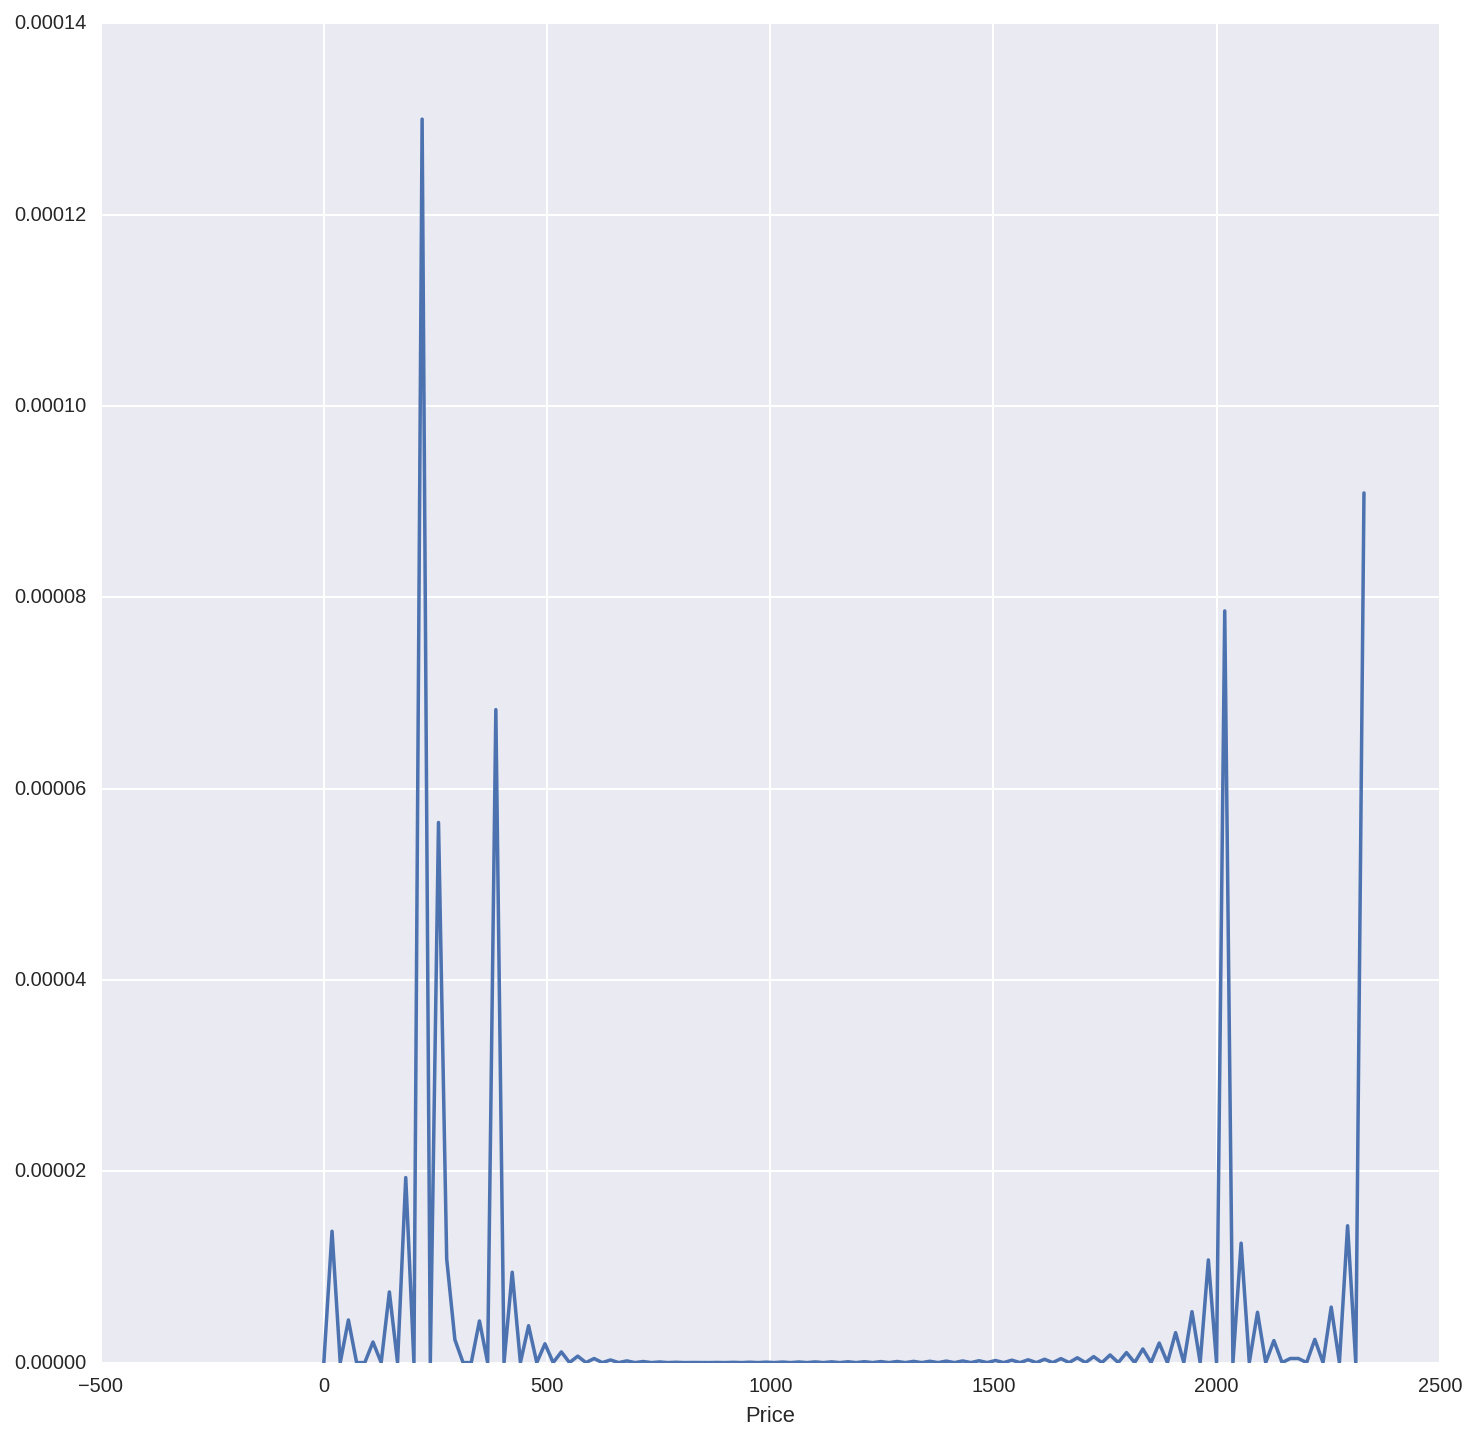

In [138]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
mark_mask = market['Traded_from']==' Bitcoin'
sns.distplot(market.loc[mark_mask,'Price'],kde=True,hist=False)
plt.show()

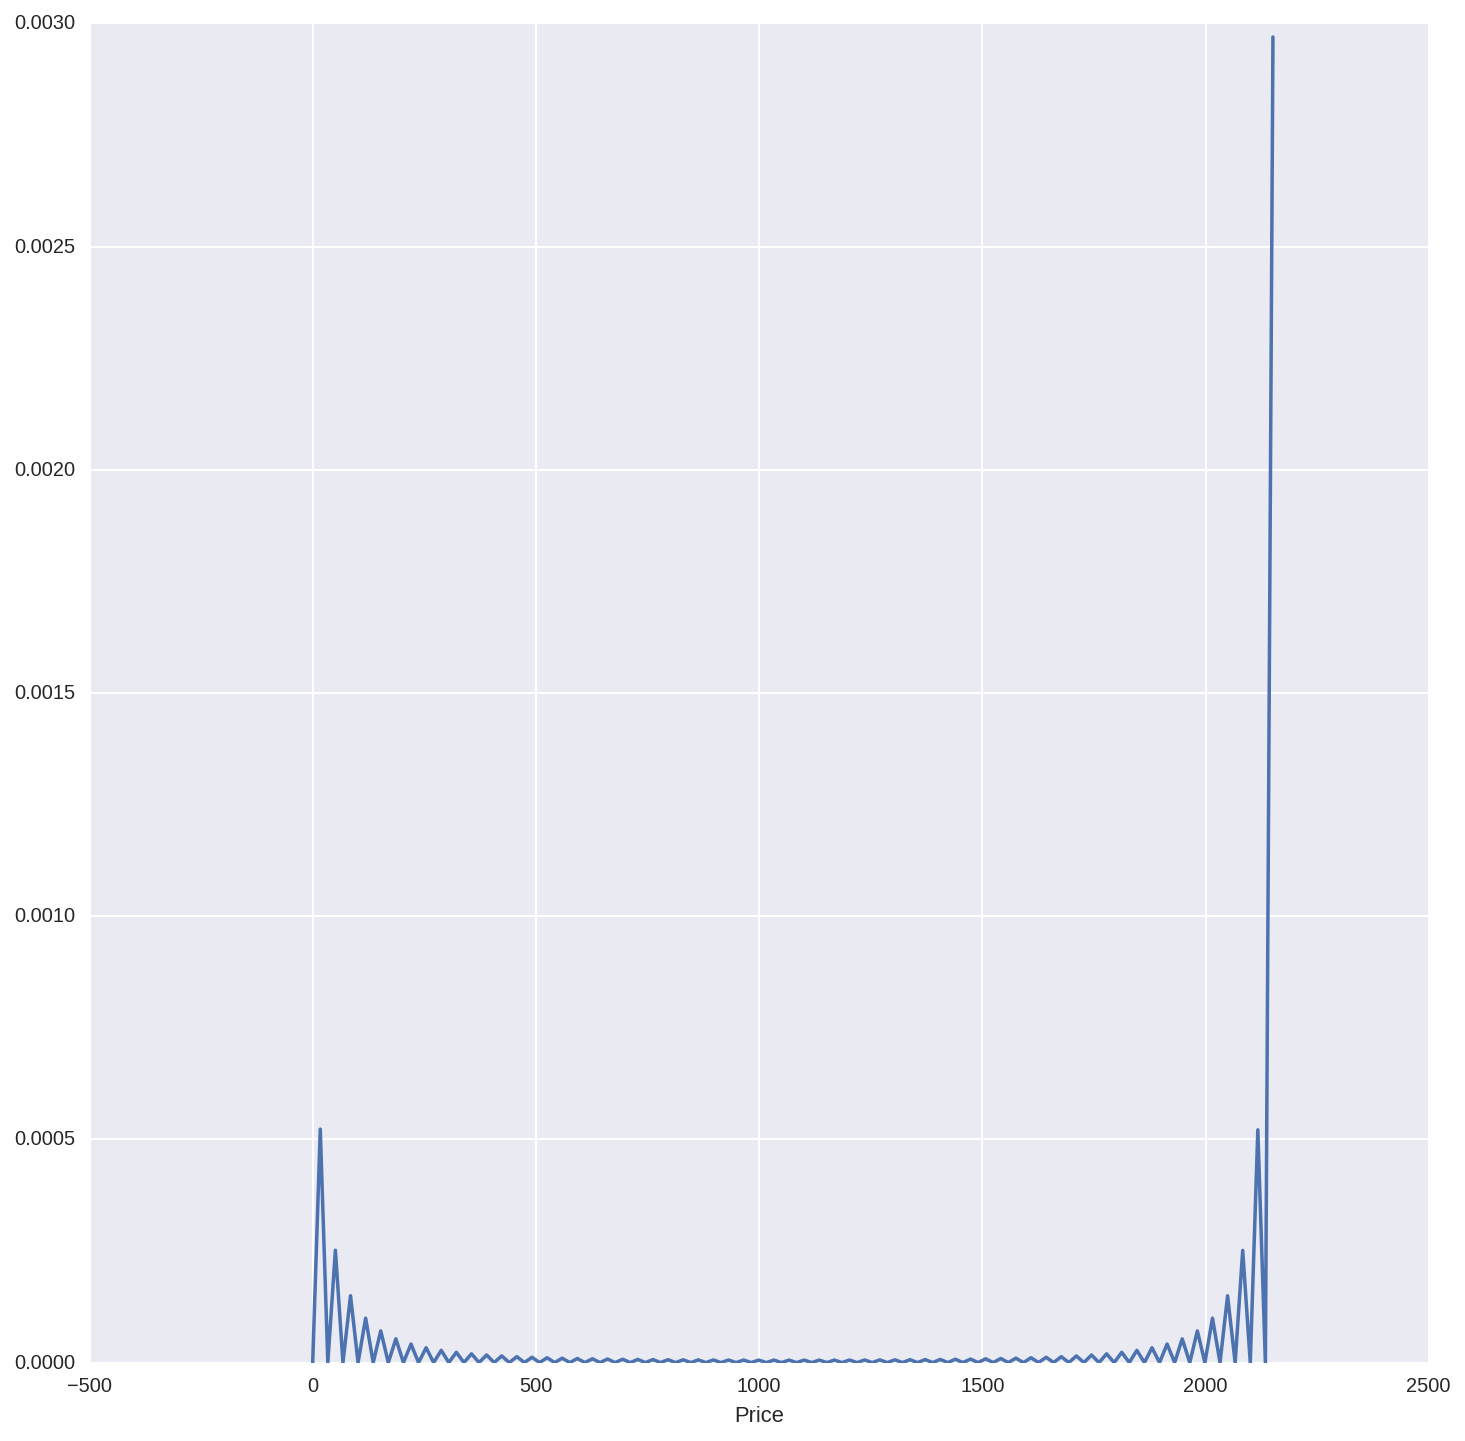

In [139]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
mark_mask = market['Traded_from']==' Ripple'
sns.distplot(market.loc[mark_mask,'Price'],kde=True,hist=False)
plt.show()

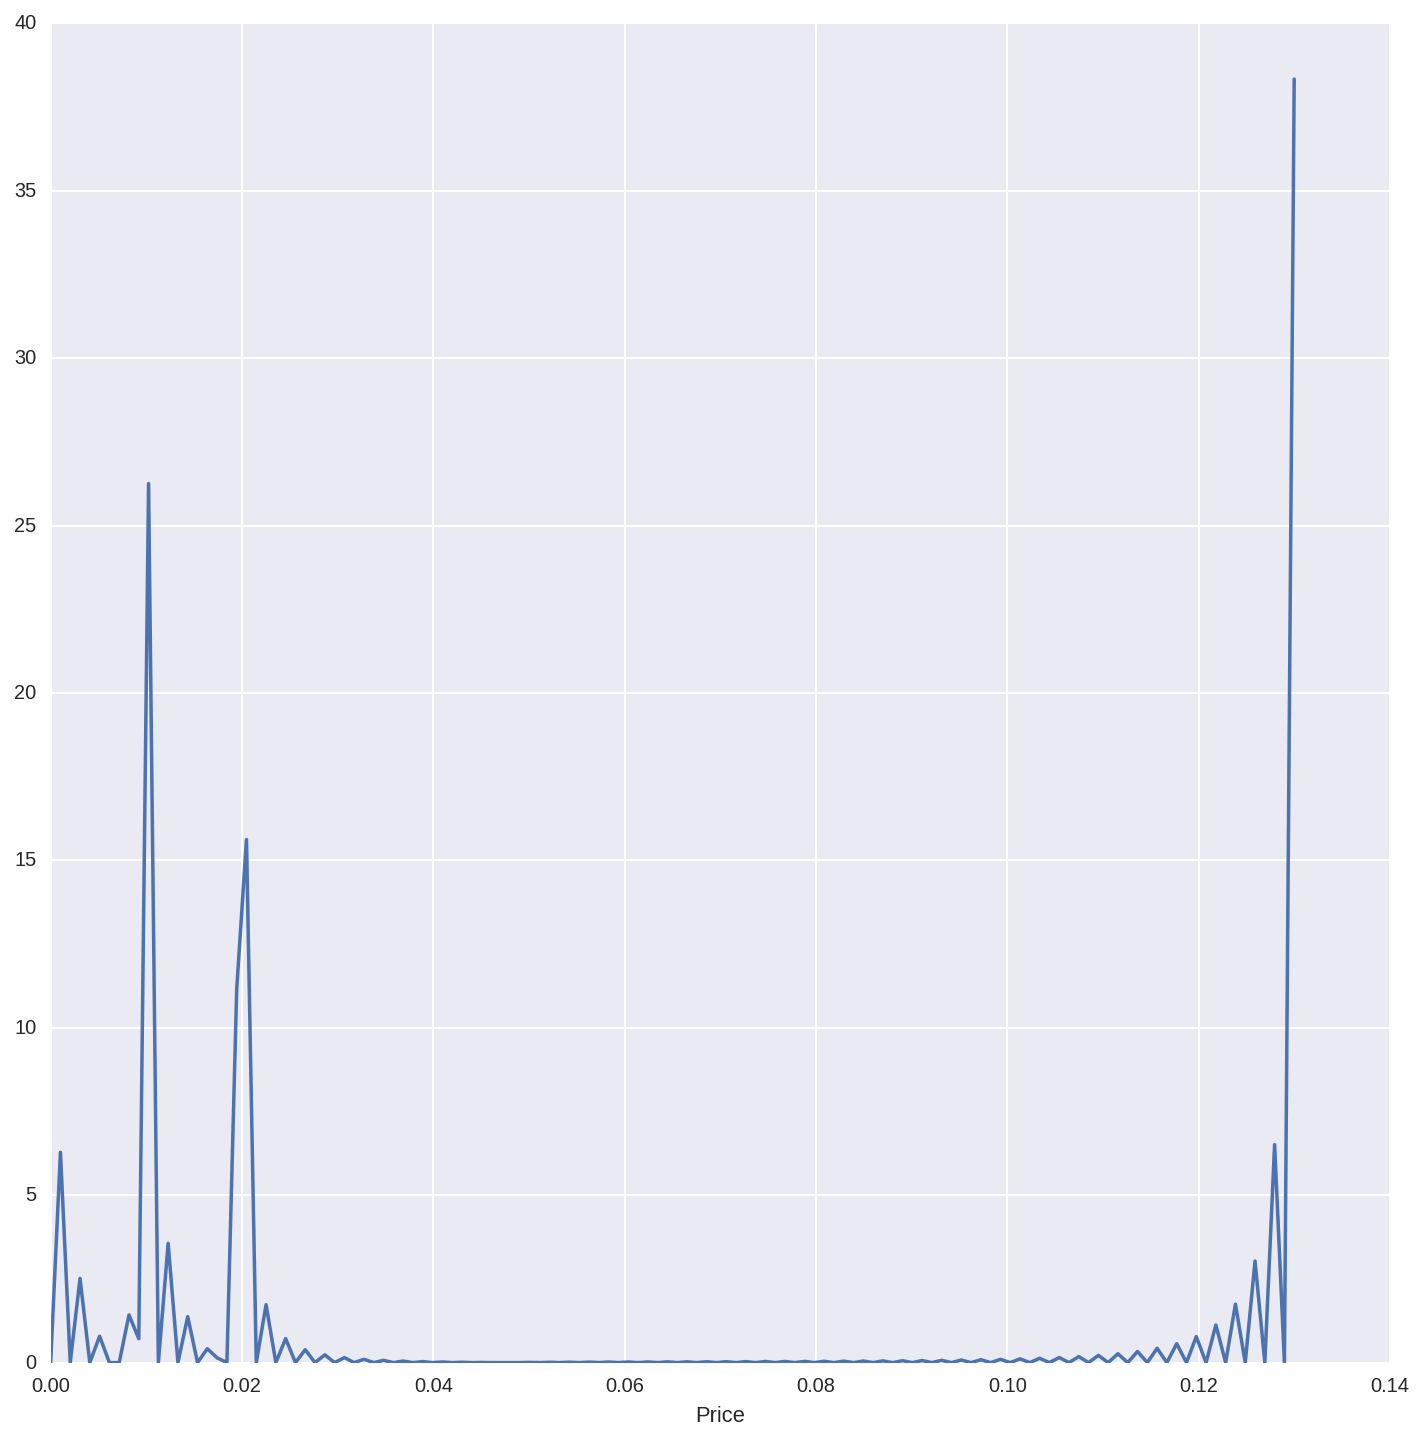

In [140]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
mark_mask = market['Traded_from']==' Dogecoin'
sns.distplot(market.loc[mark_mask,'Price'],kde=True,hist=False)
plt.show()

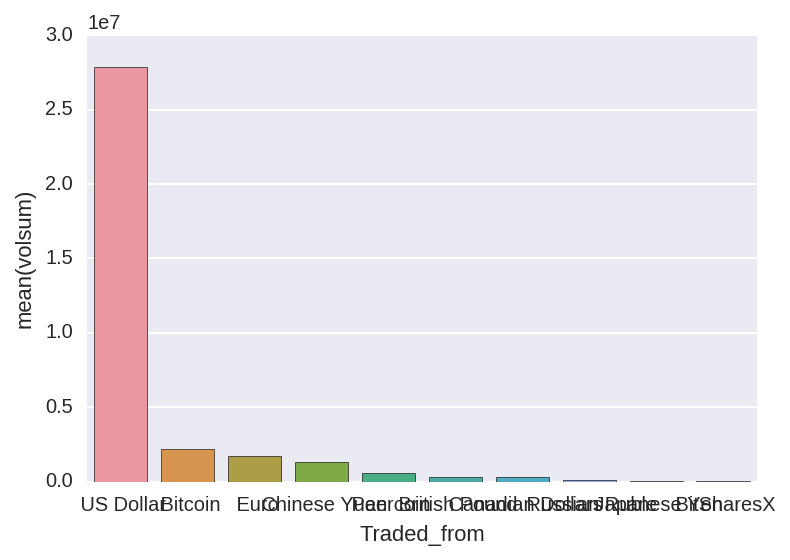

In [161]:
def volume_summer(df):
    df['volsum'] = df["Volume (17 Oct. '14)"].sum()
    return df.iloc[0,:]
        
    

volume_sums = market.groupby('Traded_from').apply(volume_summer)
volume_sums = volume_sums.sort_values(by="volsum",ascending=False)
volume_sums.iloc[0:10,:]
fig= plt.figure(figsize=(12,12))
sns.barplot(data=volume_sums.iloc[0:10,:],x='Traded_from',y="volsum")
plt.show()

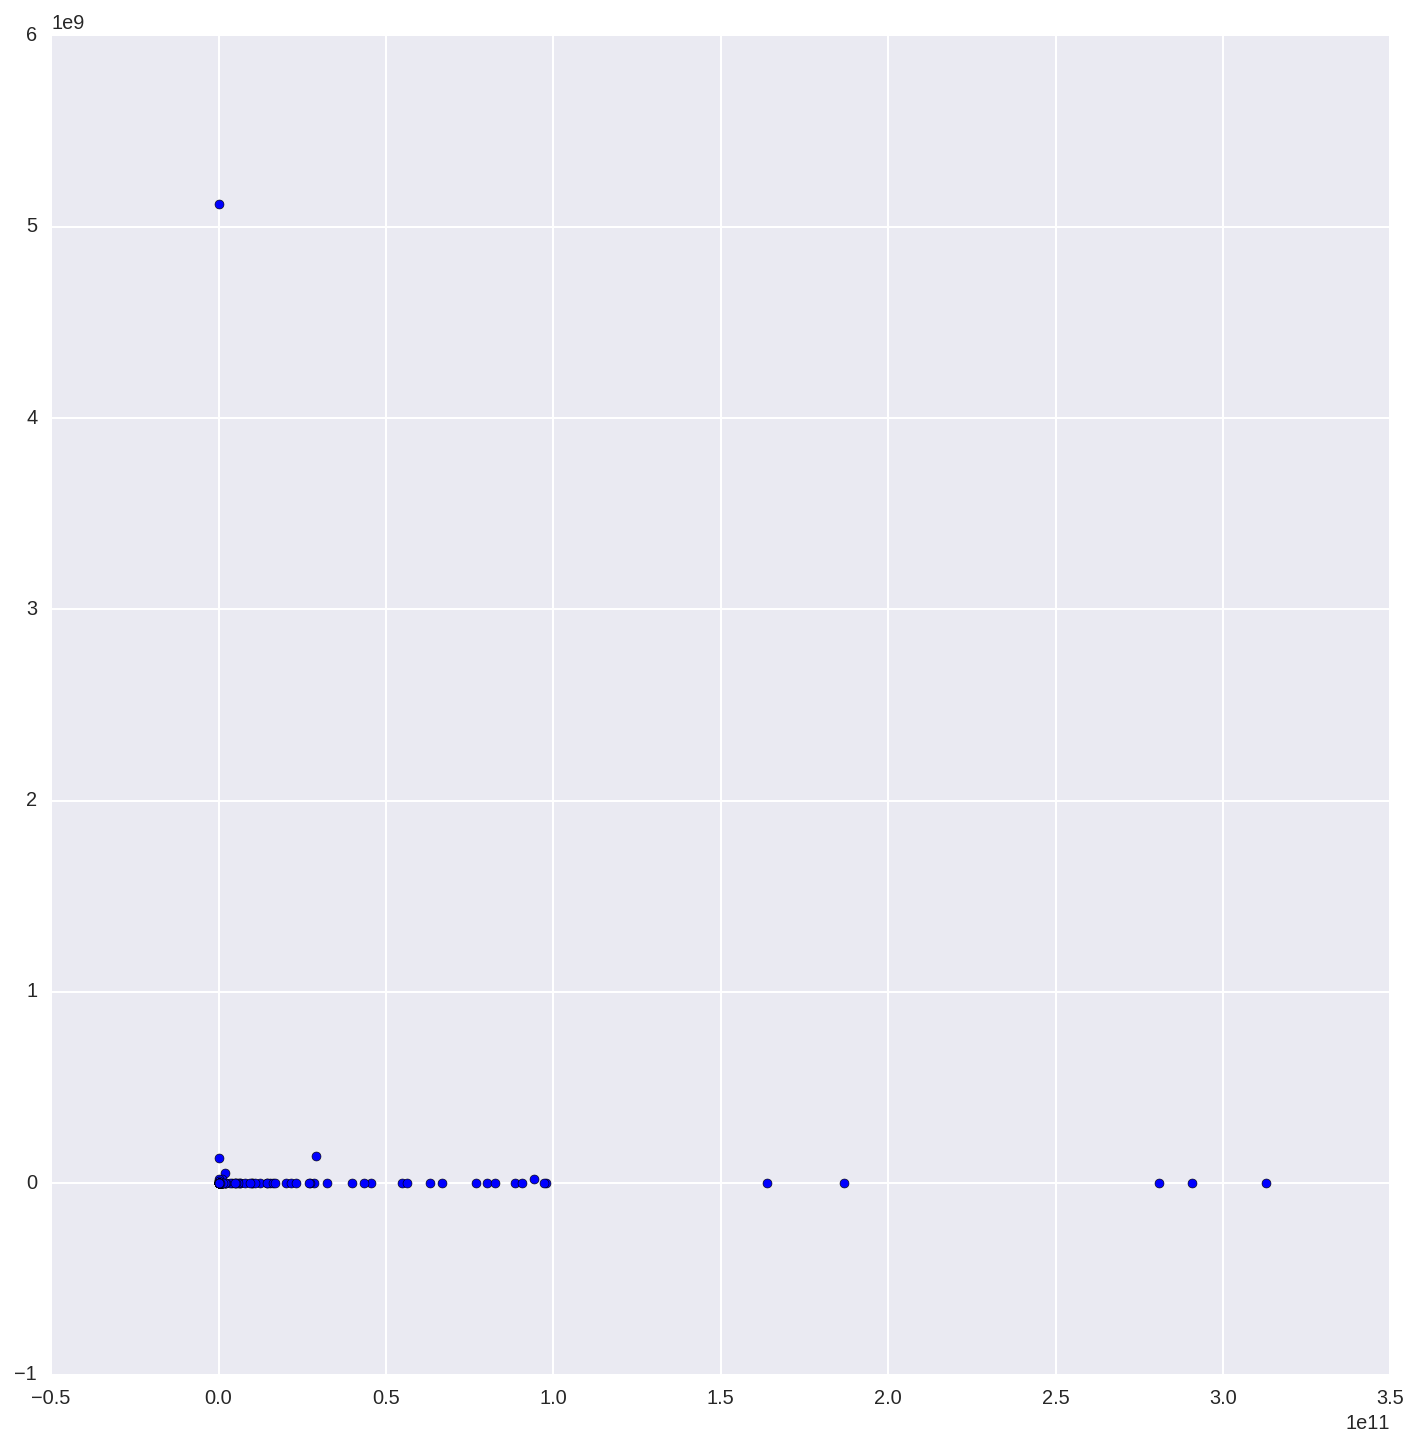

In [142]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
plt.scatter(x=currency['Avaiable Supply'],y=currency['Market Capitalization'])
plt.show()